In [1]:
import pandas as pd

In [7]:
crash_features_2018=pd.read_csv('../images_and_data/autoregression/crash_features_2018.csv')
crash_features_2019=pd.read_csv('../images_and_data/autoregression/crash_features_2019.csv')
crash_features_2020=pd.read_csv('../images_and_data/autoregression/crash_features_2020.csv')

In [9]:
crash_features_2018=crash_features_2018[['COLLISION_ID','CRASH DATE','CRASH TIME','BOROUGH','ON STREET NAME','CROSS STREET NAME']]
crash_features_2019=crash_features_2019[['COLLISION_ID','CRASH DATE','CRASH TIME','BOROUGH','ON STREET NAME','CROSS STREET NAME']]
crash_features_2020=crash_features_2020[['COLLISION_ID','CRASH DATE','CRASH TIME','BOROUGH','ON STREET NAME','CROSS STREET NAME']]

In [13]:
#concatenate dataframes for all 3 years
crash_features=pd.DataFrame()
for frame in [crash_features_2018,crash_features_2019,crash_features_2020]:
    crash_features=pd.concat([crash_features,frame])
crash_features

,COLLISION_ID,CRASH DATE,CRASH TIME,BOROUGH,ON STREET NAME,CROSS STREET NAME
0,3821772,01/01/2018,21:30,BROOKLYN,EAST 53 STREET,AVENUE N
1,4060842,01/01/2018,14:30,MANHATTAN,RIVERSIDE DRIVE,PAYSON AVENUE
2,3818865,01/01/2018,15:20,BRONX,WEBSTER AVENUE,EAST 188 STREET
3,3820768,01/01/2018,21:45,NaN,149 PLACE,NORTHERN BOULEVARD
4,3819019,01/01/2018,7:50,MANHATTAN,NaN,NaN
...,...,...,...,...,...,...
80643,4356522,10/09/2020,15:20,BROOKLYN,NaN,NaN
80644,4356596,10/09/2020,14:30,NaN,LONG ISLAND EXPRESSWAY,NaN
80645,4355971,10/09/2020,4:40,BRONX,GERARD AVENUE,EAST 146 STREET
80646,4356213,10/09/2020,16:30,MANHATTAN,WEST BROADWAY,SPRING STREET


In [19]:
crash_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489198 entries, 0 to 80647
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   COLLISION_ID       489198 non-null  int64 
 1   CRASH DATE         489198 non-null  object
 2   CRASH TIME         489198 non-null  object
 3   BOROUGH            332139 non-null  object
 4   ON STREET NAME     364271 non-null  object
 5   CROSS STREET NAME  238608 non-null  object
dtypes: int64(1), object(5)
memory usage: 36.1+ MB


In [23]:
#convert 'CRASH DATE' and 'CRASH TIME' to pandas datetime
crash_features['CRASH DATE']=pd.to_datetime(crash_features['CRASH DATE'])
crash_features['CRASH TIME']=pd.to_datetime(crash_features['CRASH TIME'])

<AxesSubplot:xlabel='CRASH DATE'>

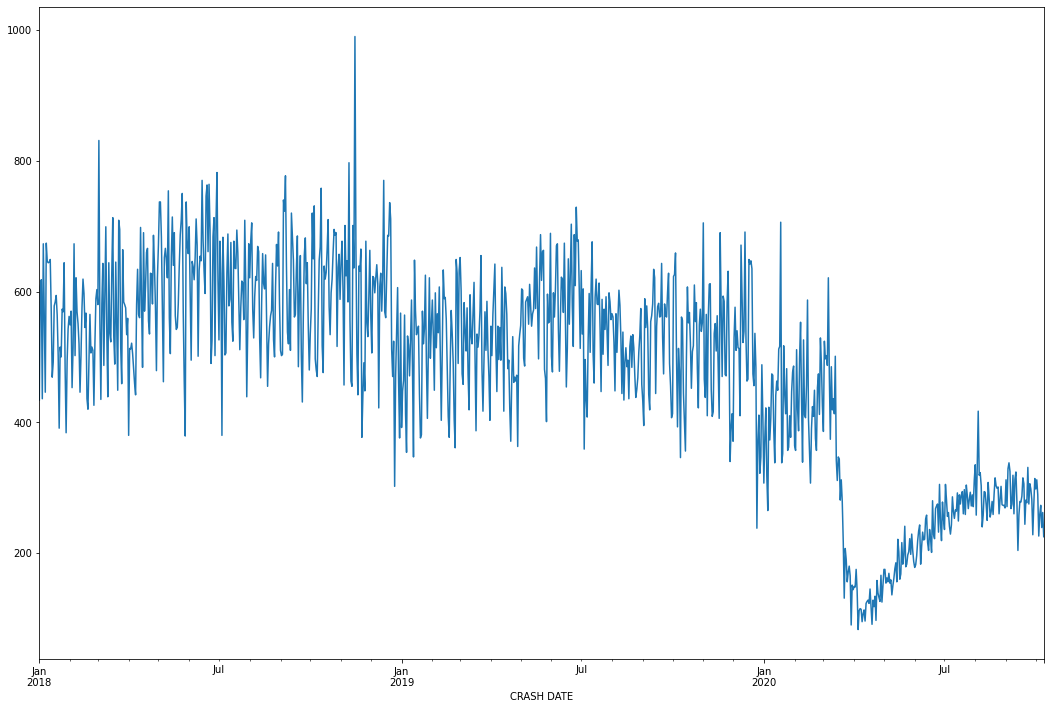

In [45]:
#group data by date and plot the trend of number of collisions per day
df_crash_by_date=crash_features.groupby(by=['CRASH DATE']).count()
df_crash_by_date['COLLISION_ID'].plot(figsize=(18,12))

In [54]:
crash_features.columns

Index(['COLLISION_ID', 'CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ON STREET NAME',
       'CROSS STREET NAME'],
      dtype='object')

In [63]:
#Number of crashes in NYC for each of the 3 years
crash_features.groupby(crash_features['CRASH DATE'].dt.year).count()

,COLLISION_ID,CRASH DATE,CRASH TIME,BOROUGH,ON STREET NAME,CROSS STREET NAME
CRASH DATE,,,,,,
2018,215442,215442,215442,144046,161833,104891
2019,193108,193108,193108,132323,143899,95354
2020,80648,80648,80648,55770,58539,38363


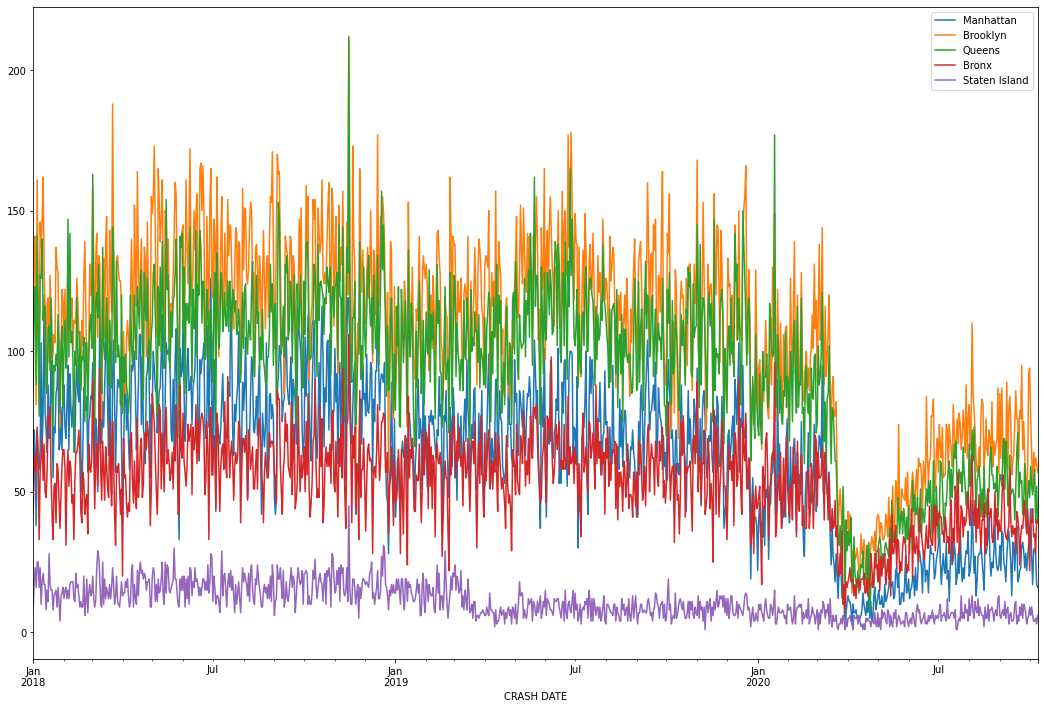

In [115]:
#Plotting trends for each of the Boroughs individually

import matplotlib.pyplot as plt
fig,ax=plt.subplots()
df_crash_by_borough.loc[('MANHATTAN',)]['NUMBER OF COLLISIONS'].plot(label='Manhattan',figsize=(18,12))
df_crash_by_borough.loc[('BROOKLYN',)]['NUMBER OF COLLISIONS'].plot(label='Brooklyn')
df_crash_by_borough.loc[('QUEENS',)]['NUMBER OF COLLISIONS'].plot(label='Queens')
df_crash_by_borough.loc[('BRONX',)]['NUMBER OF COLLISIONS'].plot(label='Bronx')
df_crash_by_borough.loc[('STATEN ISLAND',)]['NUMBER OF COLLISIONS'].plot(label='Staten Island')
plt.legend()
plt.rcParams["legend.loc"] = 'best'

<AxesSubplot:xlabel='CRASH DATE'>

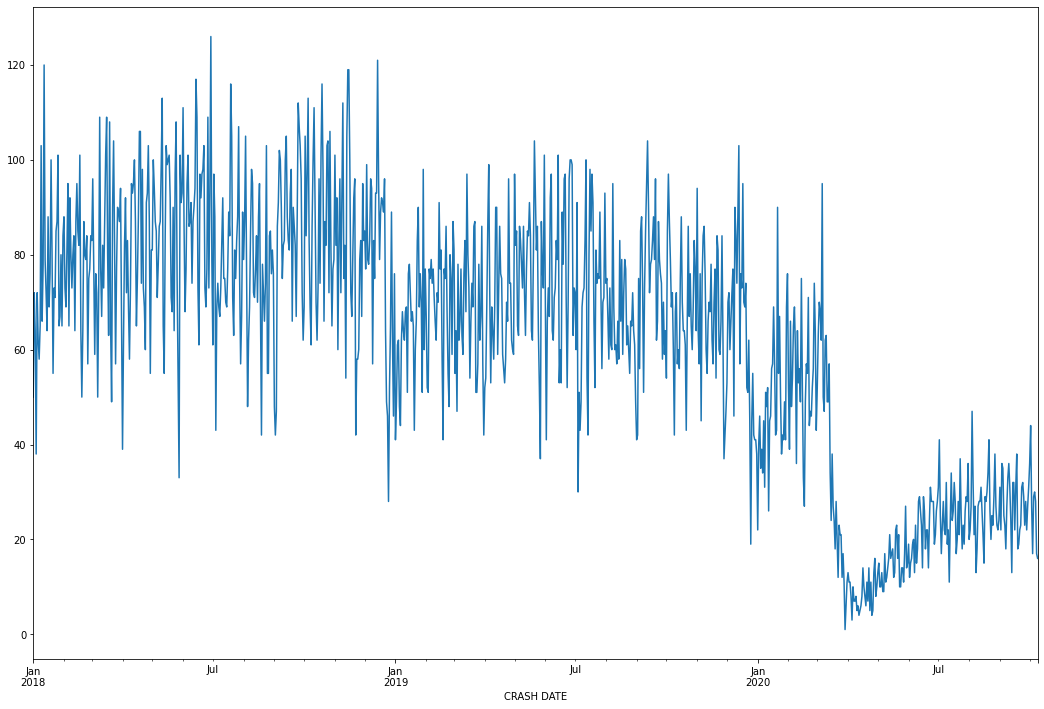

In [116]:
# 
df_crash_by_borough.loc[('MANHATTAN',)]['NUMBER OF COLLISIONS'].plot(label='Manhattan',figsize=(18,12))

In [129]:
#
crash_locations_manhattan=crash_features[crash_features['BOROUGH']=='MANHATTAN'].groupby(by='ON STREET NAME').count()
crash_locations_manhattan.sort_values(by='COLLISION_ID',ascending=False,inplace=True)
crash_locations_manhattan.rename(columns={'COLLISION_ID':'NUMBER_OF_COLLISIONS'},inplace=True)
crash_locations_manhattan[['NUMBER_OF_COLLISIONS']].head()

,NUMBER_OF_COLLISIONS
ON STREET NAME,
2 AVENUE,1750
BROADWAY,1400
3 AVENUE,1346
1 AVENUE,1140
LEXINGTON AVENUE,812


In [130]:
crash_locations_brooklyn=crash_features[crash_features['BOROUGH']=='BROOKLYN'].groupby(by='ON STREET NAME').count()
crash_locations_brooklyn.sort_values(by='COLLISION_ID',ascending=False,inplace=True)
crash_locations_brooklyn.rename(columns={'COLLISION_ID':'NUMBER_OF_COLLISIONS'},inplace=True)
crash_locations_brooklyn[['NUMBER_OF_COLLISIONS']].head()

,NUMBER_OF_COLLISIONS
ON STREET NAME,
ATLANTIC AVENUE,2094
FLATBUSH AVENUE,1300
LINDEN BOULEVARD,1135
EASTERN PARKWAY,887
KINGS HIGHWAY,850


In [131]:
crash_locations_queens=crash_features[crash_features['BOROUGH']=='QUEENS'].groupby(by='ON STREET NAME').count()
crash_locations_queens.sort_values(by='COLLISION_ID',ascending=False,inplace=True)
crash_locations_queens.rename(columns={'COLLISION_ID':'NUMBER_OF_COLLISIONS'},inplace=True)
crash_locations_queens[['NUMBER_OF_COLLISIONS']].head()

,NUMBER_OF_COLLISIONS
ON STREET NAME,
NORTHERN BOULEVARD,1862
QUEENS BOULEVARD,1525
NORTH CONDUIT AVENUE,1286
WOODHAVEN BOULEVARD,1135
ROCKAWAY BOULEVARD,1006


In [132]:
crash_locations_bronx=crash_features[crash_features['BOROUGH']=='BRONX'].groupby(by='ON STREET NAME').count()
crash_locations_bronx.sort_values(by='COLLISION_ID',ascending=False,inplace=True)
crash_locations_bronx.rename(columns={'COLLISION_ID':'NUMBER_OF_COLLISIONS'},inplace=True)
crash_locations_bronx[['NUMBER_OF_COLLISIONS']].head()

,NUMBER_OF_COLLISIONS
ON STREET NAME,
BRUCKNER BOULEVARD,1364
EAST TREMONT AVENUE,875
JEROME AVENUE,803
GRAND CONCOURSE,684
BOSTON ROAD,683


In [133]:
crash_locations_staten_island=crash_features[crash_features['BOROUGH']=='STATEN ISLAND'].groupby(by='ON STREET NAME').count()
crash_locations_staten_island.sort_values(by='COLLISION_ID',ascending=False,inplace=True)
crash_locations_staten_island.rename(columns={'COLLISION_ID':'NUMBER_OF_COLLISIONS'},inplace=True)
crash_locations_staten_island[['NUMBER_OF_COLLISIONS']].head()

,NUMBER_OF_COLLISIONS
ON STREET NAME,
HYLAN BOULEVARD,821
RICHMOND ROAD,397
AMBOY ROAD,270
VICTORY BOULEVARD,238
CLOVE ROAD,226
